In [17]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

<IPython.core.display.Javascript object>

In [3]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
HTML("""<style>
h1 {
  font-family: 'Permanent Marker', cursive;
  text-align: center;
  color: red;
  
}
ol {
  list-style-position: inside;
  margin-left: 1em;
  list-style-position: outside;
}
h2 {
  font-family: 'Permanent Marker', cursive;
  color: blue;
}
h3 {
  font-family: 'Permanent Marker', cursive;

}
</style>""")

# CHAPITRE 10 - Les grapĥes

Ce cours est une version "jupyter notebook" du [cours proposé par Stéphan Van Zuijlen](http://isn-icn-ljm.pagesperso-orange.fr/NSI-TLE/co/section_chapitre3.html)

## Introduction

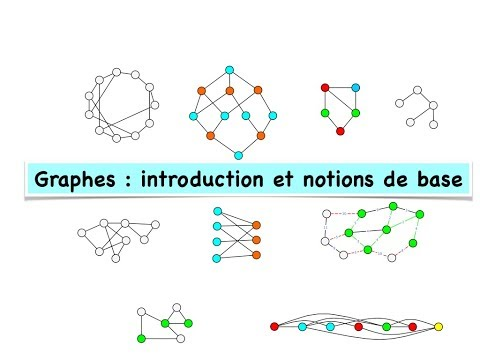

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo("YYv2R1cCTa0",width="640px", height="480px")

### Qu’est-qu’un graphe?  
Imaginez un réseau social ayant 6 abonnés (A, B, C, D, E et F) où :  
* A est ami avec B, C et D
* B est ami avec A et D
* C est ami avec A, E et D
* D est ami avec tous les autres abonnés
* E est ami avec C, D et F
* F est ami avec E et D  
  
On peut représenter ce réseau social par un schéma où :
* Chaque abonné est représenté par un cercle avec son nom.
* Chaque relation "X est ami avec Y" par un segment de droite reliant X et Y ("X est amiavec Y" et "Y est ami avec X" étant représenté par le même segment de droite).

Voici ce que cela donne avec le réseau social décrit ci-dessus :  

In [5]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
from networkx.drawing.nx_agraph import to_agraph 
import matplotlib.image as mpimg
%matplotlib notebook

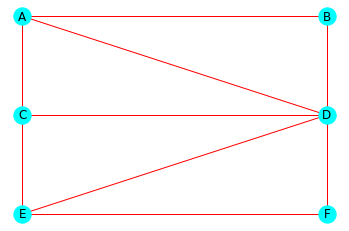

In [6]:
G = nx.DiGraph()
G.add_node("A",pos="0,40!")
G.add_node("B",pos="20,40!")
G.add_node("C",pos="0,20!")
G.add_node("D",pos="20,20!")
G.add_node("E",pos="0,0!")
G.add_node("F",pos="20,0!")
G.add_edge("A","B")
G.add_edge("A","C")
G.add_edge("A","D")
G.add_edge("B","D")
G.add_edge("C","D")
G.add_edge("C","E")
G.add_edge("D","E")
G.add_edge("D","F")
G.add_edge("E","F")



pos = graphviz_layout(G,root="A")

plt.figure("Graphe intro")
nx.draw_networkx_nodes(G, pos, node_color="cyan")
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='r', arrows=False)
plt.box(False)
plt.show()

Ce genre de figure s’appelle un graphe. Les  graphes  sont  des  objets  mathématiquestrès utilisés, notamment en informatique.Les cercles sont appelés des sommets et lessegments de droites des arêtes.

## Définitions et terminologie 

On appelle **graphe** un ensemble de points appelés **sommets** associés à un ensemble de lignes appelées **arrêtes** qui relient certains sommets entre eux.

**Ordre d’un graphe :**  
L’ordre d’un graphe est le nombre de sommets du graphe.  
  
**Adjacents (ou voisins)**  
Deux sommets sont dits adjacents s’ils sont reliés entre eux par une arête.  
  
**Degré d’un sommet**  
Le degré d’un sommet est le nombre d’arêtes issues de ce sommet.  
  
**Sommet isolé**  
Un sommet qui n’est adjacent à aucun autre sommet du graphe est dit isolé.  
  
**Graphe complet**  
Un graphe est dit complet si deux sommets quelconques distincts sont toujours adjacents. Autrement dit, tous les sommets sont reliés deux à deux par une arête.  
  
  
**Exemples:**

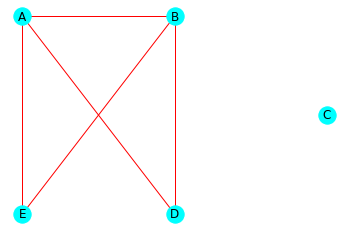

In [7]:
G = nx.DiGraph()
G.add_node("A",pos="0,40!")
G.add_node("B",pos="20,40!")
G.add_node("C",pos="40,20!")
G.add_node("D",pos="20,00!")
G.add_node("E",pos="0,0!")
G.add_edge("A","B")
G.add_edge("A","D")
G.add_edge("A","E")
G.add_edge("B","D")
G.add_edge("B","E")

pos = graphviz_layout(G,root="A")

plt.figure("Graphe non connexe")
nx.draw_networkx_nodes(G, pos, node_color="cyan")
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='r', arrows=False)
plt.box(False)
plt.show()

Le graphe de gauche est d’ordre 5 car il possède 5 sommets.  
Les sommets A et B sont adjacents.  
Les  sommets  D  et  E  ne  sont pas adjacents.  
Le sommet C est isolé.

<hr>

Le graphe de droite est complet d’ordre 3.  
Chaque sommet est de degré 2. 

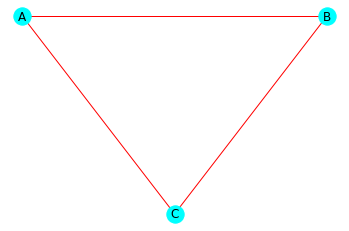

In [8]:
G = nx.DiGraph()
G.add_node("A",pos="0,40!")
G.add_node("B",pos="40,40!")
G.add_node("C",pos="20,0!")
G.add_edge("A","B")
G.add_edge("A","C")
G.add_edge("B","C")


pos = graphviz_layout(G,root="A")

plt.figure("Graphe complet")
nx.draw_networkx_nodes(G, pos, node_color="cyan")
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='r', arrows=False)
plt.box(False)
plt.show()

<hr>

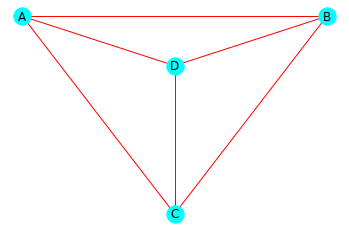

In [9]:
G = nx.DiGraph()
G.add_node("A",pos="0,40!")
G.add_node("B",pos="40,40!")
G.add_node("C",pos="20,0!")
G.add_node("D",pos="20,30!")
G.add_edge("A","B")
G.add_edge("A","C")
G.add_edge("A","D")
G.add_edge("B","C")
G.add_edge("B","D")
G.add_edge("C","D")


pos = graphviz_layout(G,root="A")

plt.figure("Graphe complet")
nx.draw_networkx_nodes(G, pos, node_color="cyan")
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='r', arrows=False)
plt.box(False)
plt.show()

Le graphe de gauche est complet d’ordre 4.  
Chaque sommet est de degré 3

### Exercice 1:
1°) Donner le degré des sommets du graphe sur le réseau social de l'introduction.  
2°) Donner son ordre.  
3°) Ce graphe est-il complet ?

Répondre ici

## Différents types de graphes

Un graphe paut être **orienté** ou **non-orienté**.

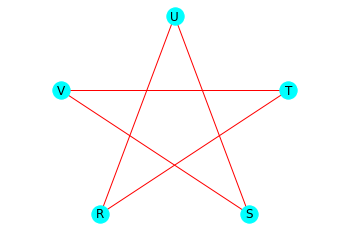

In [34]:
G = nx.DiGraph([("R","T"), ("T","V"), ("V","S"), ("S","U"),
                ("U","R")])
G.nodes["R"]['pos'] = "8,0!"
G.nodes["S"]['pos'] = "38,0!"
G.nodes["T"]['pos'] = "46,25!"
G.nodes["U"]['pos'] = "23,40!"
G.nodes["V"]['pos'] = "0,25!"

pos = graphviz_layout(G)

plt.figure("Graphe non-orienté")
nx.draw_networkx_nodes(G, pos, node_color="cyan")
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='r', arrows=False)
plt.box(False)
plt.axis("equal")
plt.show()

Dans un graphe non-orienté, chaque arête peut être parcourue dans les deux sens.

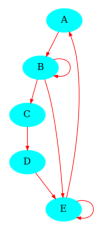

In [11]:
G=nx.MultiDiGraph([("A","B"),("B","C"),("C","D"),("D","E"),("B","E"),("B","B"), 
    ("E","E"),("E","A")])

G.graph['edge'] = {'arrowsize': '0.6', 'splines': 'curved','color':'red'}
G.graph['graph'] = {'scale': '3'}
G.graph['node'] = {'style':'filled','fillcolor' : 'cyan', 'color':'cyan'}

A = to_agraph(G) 
A.layout('dot')
A.draw('multi.png')   

img = mpimg.imread('multi.png')
plt.figure('test')
plt.box(False)
plt.axis(False)
plt.imshow(img)
plt.show()

Dans un graphe orienté, chaque arête ne peut être parcourue que dans un seul sens indiqué par une flèche.

Un graphe (orienté ou non-orienté) peut contenir des boucles c’est-à-dire une arête dont l’origine et l’extrémité correspondent au même sommet (on a par exemple une boucle B sur la représentation précédente).

## Propriété de la somme des degrés

**Propriété:**  
Le nombre d'arêtes est égal à la moitié de la somme des degrés de sommets.  
On peut voir ça aussi comme dans la vidéo, la somme des degrés des sommets est égal au double du nombre d'arêtes. 

Ce résultat s'explique assez facilement:  
En ajoutant les degrés de chaque sommet (c'est à dire le nombre d'arêtes issues de ce sommet), on comptabilise deux fois chaque arête (une fois avec le sommet d'une extrémité et une seconde fois avec le sommet de l'autre extrémité de l'arête). D'où le résultat.  
Il découle de cette propriété que la somme des degrés des sommets est nécessairement paire et donc que le nombre de sommets de degré impair est pair.

## Matrice d'adjacence

Considérons un graphe d’ordre $n \in \mathbb{N}^*$. On numérote ces sommets de 1 à n.  
  
**Définition:**  
On appelle matrice d'adjacence associée à ce graphe la matrice A dont le terme $a_{ij}$ vaut 1 si les sommets $i$ et $j$ sont reliés par une arrête et 0 sinon.  
$i$ et $j$ variant de $1$ à $n$

En numérotant les sommets de ce graphe par ordre  alphabétique,  sa  matrice  d’adjacence s’écrit:  
  
$$A = \begin{pmatrix}
0 & 1 & 1 & 0 & 1\\
1 & 0 & 1 & 1 & 0\\
1 & 1 & 0 & 1 & 0\\
0 & 1 & 1 & 0 & 0\\
1 & 0 & 0 & 0 & 0
\end{pmatrix}  $$

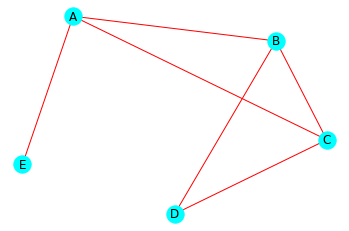

In [12]:
G = nx.DiGraph([("A","B"), ("A","E"), ("A","C"), ("B","C"),
                ("B","D"), ("C","D")])
G.nodes["A"]['pos'] = "5,40!"
G.nodes["B"]['pos'] = "25,35!"
G.nodes["C"]['pos'] = "30,15!"
G.nodes["D"]['pos'] = "15,0!"
G.nodes["E"]['pos'] = "0,10!"

pos = graphviz_layout(G)

plt.figure("matrice d'adjacence")
nx.draw_networkx_nodes(G, pos, node_color="cyan")
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='r', arrows=False)
plt.box(False)
plt.show()

**Rq:**  
Dans le cas d’un graphe *non orienté*, les coefficients $a_{ij}$ et $a_{ji}$ sont égaux pour tout i et tout j compris entre 1 et n.  
  
Autrement dit, **la matrice d’adjacence est symétrique**.  
  
Dans le cas d’un graphe *orienté*, la matrice d’adjacence n’est pas a priori symétrique.

**Rq2:**  
Une matrice peut se coder en python par une liste de listes ou avec l'objet "matrix" de la bibliothèque numpy.

In [13]:
A = [
    [0, 1, 1, 0, 1],
    [1, 0, 1, 1, 0],
    [1, 1, 0, 1, 0],
    [0, 1, 1, 0, 0],
    [1, 0, 0, 0, 0]
    ]
A

[[0, 1, 1, 0, 1],
 [1, 0, 1, 1, 0],
 [1, 1, 0, 1, 0],
 [0, 1, 1, 0, 0],
 [1, 0, 0, 0, 0]]

In [14]:
A = np.matrix(A)
A

matrix([[0, 1, 1, 0, 1],
        [1, 0, 1, 1, 0],
        [1, 1, 0, 1, 0],
        [0, 1, 1, 0, 0],
        [1, 0, 0, 0, 0]])

### Exercice 2:  
Ecrire la matrice d'adjacence du réseau social de l'introduction

## Chaine et cycle

**Définition:**  
On appelle **chaîne** toute succession d’arêtes dont l’extrémité de l’une (sauf la dernière) estl’origine de la suivante.

* Le nombre d’arêtes qui composent une chaîne est appelé **longueur de la chaîne**.  
* On appelle **chaîne fermée** toute chaîne dont l’origine et l’extrémité coïncident.  
* On appelle **cycle** toute chaîne fermée dont les arêtes sont toutes distinctes.

**Exemple:**  
Dans le graphe ci-contre:  
E-A-C-B est un chaîne de longueur 3. 
  
E-A-C-B-A-E est  une  chaîne  fermée  de  longueur 5. Ce n’est pas un cycle car l’arête A-E est parcourue deux fois.  
  
D-B-A-C-D est un cycle de longueur 4.

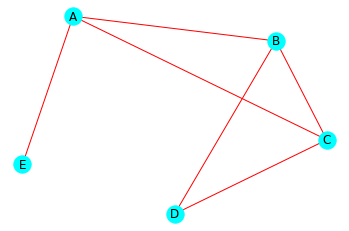

In [15]:
G = nx.DiGraph([("A","B"), ("A","E"), ("A","C"), ("B","C"),
                ("B","D"), ("C","D")])
G.nodes["A"]['pos'] = "5,40!"
G.nodes["B"]['pos'] = "25,35!"
G.nodes["C"]['pos'] = "30,15!"
G.nodes["D"]['pos'] = "15,0!"
G.nodes["E"]['pos'] = "0,10!"

pos = graphviz_layout(G)

plt.figure("cycle")
nx.draw_networkx_nodes(G, pos, node_color="cyan")
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='r', arrows=False)
plt.box(False)
plt.show()

## Compléments

### Dénombrer le nombre de chaînes de longueur **k**

Considérons un graphe d’ordre $n \in \mathbb{N}^∗$. On numérote ses sommets de $1$ à $n$. Le terme $a_{ij}$ de la matrice $A^k\ (k \in \mathbb{N}^∗)$ est égal au nombre de chaînes de longueur $k$ reliant les sommets $i$ et $j$ dans ce graphe.

En numérotant les sommets de ce graphe par ordre  alphabétique,  sa  matrice d’adjacence s’écrit:
$A = \begin{pmatrix}
0 & 1 & 1 & 0 & 1\\
1 & 0 & 1 & 1 & 0\\
1 & 1 & 0 & 1 & 0\\
0 & 1 & 1 & 0 & 0\\
1 & 0 & 0 & 0 & 0
\end{pmatrix}$  
  
On a donc $A^3 = \begin{pmatrix}
2 & 6 & 6 & 2 & 2\\
6 & 4 & 5 & 5 & 1\\
6 & 5 & 4 & 5 & 1\\
2 & 5 & 5 & 2 & 2\\
3 & 1 & 1 & 2 & 0
\end{pmatrix} $  
  
Il  existe  donc  5  chaînes  de  longueur  3  reliant  le  sommet  B  au  sommet  C  puisque $a_{23} = a_{32} = 5$.

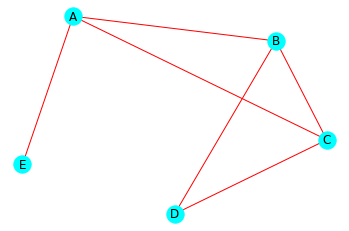

In [16]:
G = nx.DiGraph([("A","B"), ("A","E"), ("A","C"), ("B","C"),
                ("B","D"), ("C","D")])
G.nodes["A"]['pos'] = "5,40!"
G.nodes["B"]['pos'] = "25,35!"
G.nodes["C"]['pos'] = "30,15!"
G.nodes["D"]['pos'] = "15,0!"
G.nodes["E"]['pos'] = "0,10!"

pos = graphviz_layout(G)

plt.figure("cycle")
nx.draw_networkx_nodes(G, pos, node_color="cyan")
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='r', arrows=False)
plt.box(False)
plt.show()

### Exercice 3:  
Ecrire ces 5 chaînes

Répondre ici  
  
Pour vous aider, la première est B-C-B-C

### Complément: le produit de matrices carrées  
![schéma](https://user.oc-static.com/files/420001_421000/420021.png)

Posons $A = \begin{pmatrix}
a & b\\
c & d
\end{pmatrix}$ et $B = \begin{pmatrix}
e & f\\
g & h
\end{pmatrix}$ alors $A\times B = \begin{pmatrix}
ae + bg & af + bh\\
ce + dg & cf + dh
\end{pmatrix}$

Pour calculer $A^2$ on peut donc faire avec $A = \begin{pmatrix}
1 & 2\\
3 & 4
\end{pmatrix}$:  
  
$A^2 = A \times A = \begin{pmatrix}
1 & 2\\
3 & 4
\end{pmatrix} 
\times
\begin{pmatrix}
1 & 2\\
3 & 4
\end{pmatrix} 
=
\begin{pmatrix}
1\times 1 + 2\times 3 & 1\times 2 + 2\times 4\\
3\times 1 + 4\times 3 & 3\times 2 + 4\times 4
\end{pmatrix} $



En python, on peut le faire avec une complexité en $O(n^3)$:

In [18]:
def prodmat(A,B):
    assert len(B) == len(A[0])
    reponse = []
    for i in range(len(A)): # pour chaque ligne de A, une ligne de réponse
        ligne = []
        for j in range(len(B[0])): # pour chaque colonne de B, un coefficient dans réponse
            coeff = 0
            for k in range(len(B)): #len(A[0]) = len(B) est le nombre de termes de la somme
                coeff += A[i][k] * B[k][j]
            ligne.append(coeff)
        reponse.append(ligne)
    return reponse

def puissance(A,n):
    assert type(n) == int and n > 0
    reponse = A
    for i in range(n-1):
        reponse = prodmat(reponse,A)
    return reponse

In [21]:
A = [
    [0, 1, 1, 0, 1],
    [1, 0, 1, 1, 0],
    [1, 1, 0, 1, 0],
    [0, 1, 1, 0, 0],
    [1, 0, 0, 0, 0]
    ]
puissance(A,3)

[[2, 6, 6, 2, 3],
 [6, 4, 5, 5, 1],
 [6, 5, 4, 5, 1],
 [2, 5, 5, 2, 2],
 [3, 1, 1, 2, 0]]

La bibliothèque numpy nous permet de travailler avec les fonctions et opérateurs prédéfinis

In [22]:
A = np.matrix([
    [0, 1, 1, 0, 1],
    [1, 0, 1, 1, 0],
    [1, 1, 0, 1, 0],
    [0, 1, 1, 0, 0],
    [1, 0, 0, 0, 0]
    ])
A**3

matrix([[2, 6, 6, 2, 3],
        [6, 4, 5, 5, 1],
        [6, 5, 4, 5, 1],
        [2, 5, 5, 2, 2],
        [3, 1, 1, 2, 0]])

### Exercice 4:
Déterminer le nombre de chaînes de longueur 3 reliant A et F pour le graphe du réseau social de l'introduction.

### Notion de connexité

**Définition:**  
Un graphe est dit **connexe** si deux de ses sommets quelconques sont toujours reliés par une chaine.  
Un graphe est dit **complet** si tous ses sommets sont adjacents deux à deux.

Le graphe ci-dessous est connexe mais pas complet.

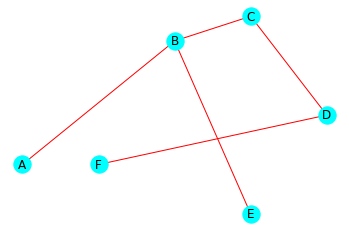

In [23]:
G = nx.DiGraph([("A","B"), ("B","C"), ("C","D"), ("D","F"),
                ("B","E")])
G.nodes["A"]['pos'] = "0,10!"
G.nodes["B"]['pos'] = "20,35!"
G.nodes["C"]['pos'] = "30,40!"
G.nodes["D"]['pos'] = "40,20!"
G.nodes["E"]['pos'] = "30,0!"
G.nodes['F']['pos'] = "10,10!"

pos = graphviz_layout(G)

plt.figure("cycle")
nx.draw_networkx_nodes(G, pos, node_color="cyan")
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='r', arrows=False)
plt.box(False)
plt.show()

<hr>

Le graphe ci-dessous n'est ni connexe ni complet

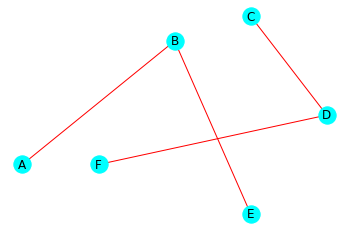

In [24]:
G = nx.DiGraph([("A","B"), ("C","D"), ("D","F"),
                ("B","E")])
G.nodes["A"]['pos'] = "0,10!"
G.nodes["B"]['pos'] = "20,35!"
G.nodes["C"]['pos'] = "30,40!"
G.nodes["D"]['pos'] = "40,20!"
G.nodes["E"]['pos'] = "30,0!"
G.nodes['F']['pos'] = "10,10!"

pos = graphviz_layout(G)

plt.figure("cycle")
nx.draw_networkx_nodes(G, pos, node_color="cyan")
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='r', arrows=False)
plt.box(False)
plt.show()

<hr>

Le graphe ci-dessous est connexe et complet

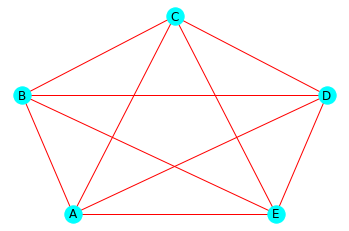

In [28]:
G = nx.DiGraph([("A","B"), ("A","C"), ("A","D"), ("A","E"),
                ("B","C"), ("B","D"), ("B","E"), ("C","D"), 
                ("C","E"), ("D","E")])
G.nodes["A"]['pos'] = "10,0!"
G.nodes["B"]['pos'] = "5,30!"
G.nodes["C"]['pos'] = "20,50!"
G.nodes["D"]['pos'] = "35,30!"
G.nodes["E"]['pos'] = "30,0!"

pos = graphviz_layout(G)

plt.figure("cycle")
nx.draw_networkx_nodes(G, pos, node_color="cyan")
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='r', arrows=False)
plt.box(False)
plt.show()

**Rq:**  
Un graphe complet est obligatoirement connexe mais la réciproque est fausse comme le montre le premier exemple.

### Exercice 5:  
Pour le graphe du réseau social de l'introduction, que dire de sa connexité ? Est-il complet ? (justifier)

## Chaines et cycles eulériens

**Définition:**  
On appelle **chaine eulérienne** d'un graphe toute chaine qui contient une fois et une seule toutes les arêtes du graphe.  
On appelle **cycle eulérien** une chaîne eulérienne fermée.

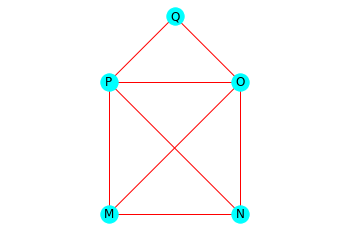

In [32]:
G = nx.DiGraph([("M","P"), ("M","N"), ("M","O"), ("P","O"),
                ("P","Q"), ("O","Q"), ("O","N"), ("P","N")])
G.nodes["M"]['pos'] = "0,0!"
G.nodes["N"]['pos'] = "30,0!"
G.nodes["O"]['pos'] = "30,30!"
G.nodes["P"]['pos'] = "0,30!"
G.nodes["Q"]['pos'] = "15,45!"

pos = graphviz_layout(G)

plt.figure("cycle")
nx.draw_networkx_nodes(G, pos, node_color="cyan")
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='r', arrows=False)
plt.box(False)
plt.axis('equal')
plt.show()

La chaine M-P-Q-O-M-N-P-O-N est une chaine eulérienne. Elle passe plusieurs fois par le même noeud mais ne balaye qu'une et une suele fois chaque arête. Cette chaine contient bien 8 arêtes distinctes.

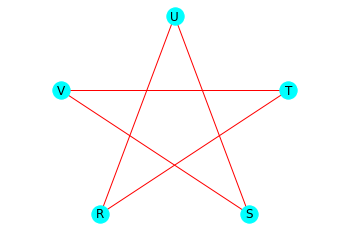

In [35]:
G = nx.DiGraph([("R","T"), ("T","V"), ("V","S"), ("S","U"),
                ("U","R")])
G.nodes["R"]['pos'] = "8,0!"
G.nodes["S"]['pos'] = "38,0!"
G.nodes["T"]['pos'] = "46,25!"
G.nodes["U"]['pos'] = "23,40!"
G.nodes["V"]['pos'] = "0,25!"

pos = graphviz_layout(G)

plt.figure("Graphe non-orienté")
nx.draw_networkx_nodes(G, pos, node_color="cyan")
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='r', arrows=False)
plt.box(False)
plt.axis("equal")
plt.show()

Le cycle R-U-S-V-T-R est un cycle eulérien.

### Le théorème d'Euler

**Théorème:**  
Soit G un graphe connexe.  
G admet un cycle eulérien si et seulement si tous les sommets de G sont de degré pair (on ressort du noeud à chaque fois qu'on y entre).  
G admet une chaine eulérienne (non fermée) si et seulement si le nombre de sommets de degré impair dans G est 2 (on ressort de chaque sommet que l'on visite sauf le premier pour lequel on sort une fois de plus et le dernier pour lequel on entre une fois de plus). Ainsi les extrémités d ela chaine eulérienne sont les deux sommets de degré impair.

### Exercice 6:  
Pour le graphe du réseau social de l'introduction, y-a-t-il une chaine eulérienne ? Un cycle eulérien ?